In [1]:
!pwd

/Users/moussadoumbia/Desktop/my_folder/academy/IT/DATA_SCIENCE/SRPING 2021


# FINAL INDIVIDUAL PROJECT

## **Visualize the sales data** 


### BigMart is one of the biggest retailer of Europe and has operations across multiple countries. 
### You are a data analyst in IT team of BigMart. Invoice and SKU wise Sales Data for Year 2011 is shared with you. You need to prepare meaningful charts to show case the various sales trends for 2011 to top management.  Key issues Data should be displayed pictorially to capture the attention of top management Considerations.


* ### Import libraries that will allow you to read the csv file and vusialize the dataset

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* ## Convert the csv file onto a pandas dataframe

In [3]:
bigmart_csv = pd.read_csv("BigMartSalesData.csv", delimiter=",")
df = pd.DataFrame(bigmart_csv)

* ## Check the first five rows of the dataframe

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,01-12-10,1,12,2010,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,01-12-10,1,12,2010,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom


* ## How rows and columns are there?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541874 entries, 0 to 541873
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541874 non-null  object 
 1   StockCode    541874 non-null  object 
 2   Description  540422 non-null  object 
 3   Quantity     541874 non-null  int64  
 4   UnitPrice    541874 non-null  float64
 5   Amount       541874 non-null  float64
 6   InvoiceDate  541874 non-null  object 
 7   Day          541874 non-null  int64  
 8   Month        541874 non-null  int64  
 9   Year         541874 non-null  int64  
 10  CustomerID   406829 non-null  float64
 11  Country      541874 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 49.6+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541874 entries, 0 to 541873
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541874 non-null  object 
 1   StockCode    541874 non-null  object 
 2   Description  540422 non-null  object 
 3   Quantity     541874 non-null  int64  
 4   UnitPrice    541874 non-null  float64
 5   Amount       541874 non-null  float64
 6   InvoiceDate  541874 non-null  object 
 7   Day          541874 non-null  int64  
 8   Month        541874 non-null  int64  
 9   Year         541874 non-null  int64  
 10  CustomerID   406829 non-null  float64
 11  Country      541874 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 49.6+ MB


In [6]:
# There are 12 columns and 541874 rows

* ## Get some statistical information about the datset.

In [6]:
aggregations = ['count', 'mean', 'std', 'min', (lambda x: x.quantile(0.25)), 'median', (lambda x: x.quantile(0.75)), 'max']

aggregations_renamed = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

field_list = ['Quantity', 'UnitPrice', 'Amount', 'Day', 'Month', 'Year', 'CustomerID']

df_agg = df[field_list].agg(aggregations)
df_agg.index = aggregations_renamed

df_agg

,Quantity,UnitPrice,Amount,Day,Month,Year,CustomerID
count,541874.000000,541874.000000,541874.000000,541874.000000,541874.000000,541874.000000,406829.000000
mean,11.341028,4.610038,21.297578,15.022902,7.553228,2010.921607,15287.690570
std,218.002505,96.762800,378.651364,8.663960,3.509063,0.268789,1713.600303
min,1.000000,-11062.060000,-11062.060000,1.000000,1.000000,2010.000000,12346.000000
25%,1.000000,1.250000,3.750000,7.000000,5.000000,2011.000000,13953.000000
50%,3.000000,2.080000,9.900000,15.000000,8.000000,2011.000000,15152.000000
75%,10.000000,4.130000,17.700000,22.000000,11.000000,2011.000000,16791.000000
max,80995.000000,38970.000000,168469.600000,31.000000,12.000000,2011.000000,18287.000000


,Quantity,UnitPrice,Amount,Day,Month,Year,CustomerID
count,541874.000000,541874.000000,541874.000000,541874.000000,541874.000000,541874.000000,406829.000000
mean,11.341028,4.610038,21.297578,15.022902,7.553228,2010.921607,15287.690570
std,218.002505,96.762800,378.651364,8.663960,3.509063,0.268789,1713.600303
min,1.000000,-11062.060000,-11062.060000,1.000000,1.000000,2010.000000,12346.000000
25%,1.000000,1.250000,3.750000,7.000000,5.000000,2011.000000,13953.000000
50%,3.000000,2.080000,9.900000,15.000000,8.000000,2011.000000,15152.000000
75%,10.000000,4.130000,17.700000,22.000000,11.000000,2011.000000,16791.000000
max,80995.000000,38970.000000,168469.600000,31.000000,12.000000,2011.000000,18287.000000


* ## What are the top ten items sold by USA?

In [7]:
df[df['Country'] == 'USA'].groupby('Description')['Quantity'].sum().sort_values(ascending=False)[0:10]

Description
SET/10 PINK POLKADOT PARTY CANDLES     96
SET/10 BLUE POLKADOT PARTY CANDLES     96
SET/10 RED POLKADOT PARTY CANDLES      96
SET/10 IVORY POLKADOT PARTY CANDLES    96
SET 12 COLOURING PENCILS DOILY         88
SET OF 5 LUCKY CAT MAGNETS             72
MINI PAINT SET VINTAGE                 72
12 PENCILS SMALL TUBE RED RETROSPOT    72
WRAP ENGLISH ROSE                      50
BLUE POLKADOT WRAP                     50
Name: Quantity, dtype: int64

Description
CARD DOLLY GIRL                       4
TEA PARTY BIRTHDAY CARD               4
EMBROIDERED RIBBON REEL SUSIE         3
PINK HAPPY BIRTHDAY BUNTING           3
SET 2 PANTRY DESIGN TEA TOWELS        3
SET OF 12 FAIRY CAKE BAKING CASES     3
SET OF 3 CAKE TINS PANTRY DESIGN      3
SET OF 36 TEATIME PAPER DOILIES       3
SET OF 6 RIBBONS VINTAGE CHRISTMAS    3
SET/10 BLUE POLKADOT PARTY CANDLES    3
Name: Description, dtype: int64

* ## What are the top ten items sold in the United Kingdom?

In [8]:
df[df['Country'] == 'United Kingdom'].groupby('Description')['Quantity'].sum().sort_values(ascending=False)[0:10]

Description
PAPER CRAFT , LITTLE BIRDIE           161990
MEDIUM CERAMIC TOP STORAGE JAR        151503
WORLD WAR 2 GLIDERS ASSTD DESIGNS      50726
JUMBO BAG RED RETROSPOT                45369
WHITE HANGING HEART T-LIGHT HOLDER     38295
POPCORN HOLDER                         35111
ASSORTED COLOUR BIRD ORNAMENT          33791
PACK OF 12 LONDON TISSUES              25355
PACK OF 72 RETROSPOT CAKE CASES        25270
VICTORIAN GLASS HANGING T-LIGHT        24142
Name: Quantity, dtype: int64

Description
WHITE HANGING HEART T-LIGHT HOLDER    2271
JUMBO BAG RED RETROSPOT               2001
REGENCY CAKESTAND 3 TIER              1859
PARTY BUNTING                         1634
LUNCH BAG RED RETROSPOT               1460
ASSORTED COLOUR BIRD ORNAMENT         1416
SET OF 3 CAKE TINS PANTRY DESIGN      1316
LUNCH BAG  BLACK SKULL.               1292
NATURAL SLATE HEART CHALKBOARD        1250
HEART OF WICKER SMALL                 1199
Name: Description, dtype: int64

* ## What are the top ten countries contributes more towards sales?

In [21]:
df.groupby('Country')[field_list].mean()

,Quantity,UnitPrice,Amount,Day,Month,Year,CustomerID
Country,,,,,,,
Australia,67.327244,3.220612,111.171843,14.592534,6.116759,2010.972200,12464.656076
Austria,12.306733,4.243192,25.543741,16.561097,7.625935,2010.977556,12521.451372
Bahrain,19.368421,4.556316,50.520000,11.473684,5.157895,2010.947368,12354.529412
Belgium,11.272112,3.644335,20.049164,15.367327,7.387144,2010.954084,12430.298695
Brazil,11.125000,4.456250,35.737500,15.000000,4.000000,2011.000000,12769.000000
...,...,...,...,...,...,...,...
Switzerland,15.452048,3.403442,28.868357,16.069431,7.293706,2010.975524,12666.977091
USA,13.340206,2.216426,18.659313,11.542955,9.841924,2011.000000,12618.852234
United Arab Emirates,14.441176,3.380735,27.974706,7.044118,5.911765,2011.000000,14984.588235


,Quantity,UnitPrice,Amount,Day,Month,Year,CustomerID
Country,,,,,,,
Australia,67.327244,3.220612,111.171843,14.592534,6.116759,2010.972200,12464.656076
Austria,12.306733,4.243192,25.543741,16.561097,7.625935,2010.977556,12521.451372
Bahrain,19.368421,4.556316,50.520000,11.473684,5.157895,2010.947368,12354.529412
Belgium,11.272112,3.644335,20.049164,15.367327,7.387144,2010.954084,12430.298695
Brazil,11.125000,4.456250,35.737500,15.000000,4.000000,2011.000000,12769.000000
Canada,18.298013,6.030331,24.280662,15.039735,6.377483,2011.000000,17321.079470
Channel Islands,12.536939,4.932124,27.459881,13.802111,6.791557,2010.977573,14888.151715
Cyprus,10.297428,6.302363,22.885000,12.437299,7.326367,2010.866559,12404.951768
Czech Republic,25.000000,2.938333,31.525333,18.200000,5.700000,2011.000000,12781.000000


In [34]:
df.groupby('Country')['Amount'].count().sort_values(ascending=False)

Country
United Kingdom    495443
Germany             9495
France              8557
EIRE                8196
Spain               2533
                   ...  
Lithuania             35
Brazil                32
Czech Republic        30
Bahrain               19
Saudi Arabia          10
Name: Amount, Length: 38, dtype: int64

United Kingdom    495443
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64

* ## Plot Total Sales Per Month.  How the total sales have increased over months. Which month has Highest Sales?

<span class="burk">(Hint: Group by month and select the Amount column)</span>

Text(0.5, 1.0, 'Sales per month')

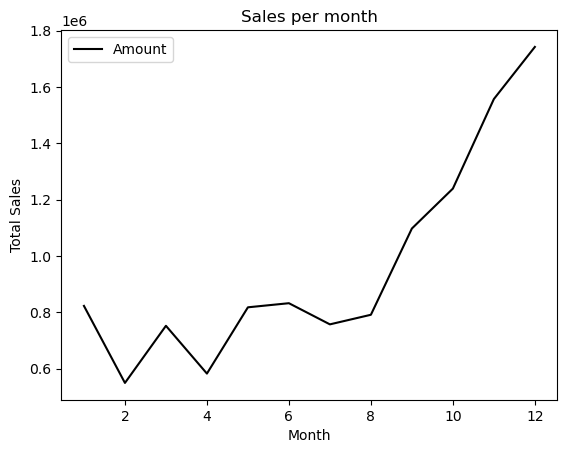

In [53]:
amount_by_month = df.groupby('Month')['Amount'].sum()
amount_by_month.plot(color='black', legend=True, label='Amount')
plt.ylabel('Total Sales')
plt.title('Sales per month')

Text(0.5, 1.0, 'Sales per month')

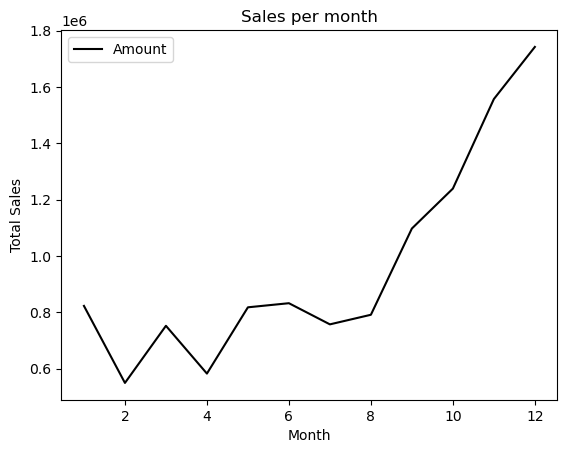

* ## Repoduce the plot below


Month
1      822669.640
2      549134.460
3      752003.310
4      582318.451
5      817655.200
6      832231.670
7      757108.941
8      791173.020
9     1097467.722
10    1239237.260
11    1557236.410
12    1742367.690
Name: Amount, dtype: float64


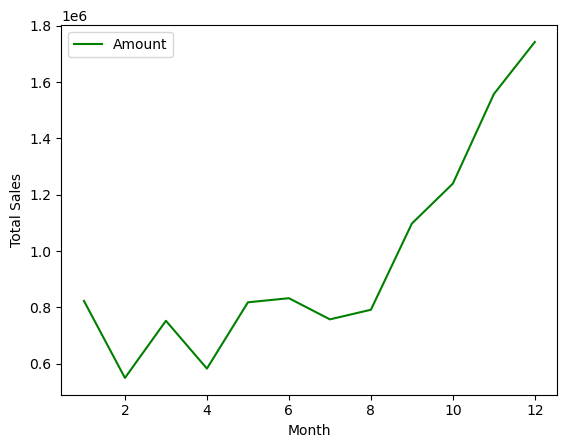

In [54]:
print(amount_by_month)

amount_by_month.plot(color='green', legend=True, label='Amount')
plt.ylabel('Total Sales')
plt.show()

            Amount
Month             
1       822669.640
2       549134.460
3       752003.310
4       582318.451
5       817655.200
6       832231.670
7       757108.941
8       791173.020
9      1097467.722
10     1239237.260
11     1557236.410
12     1742367.690


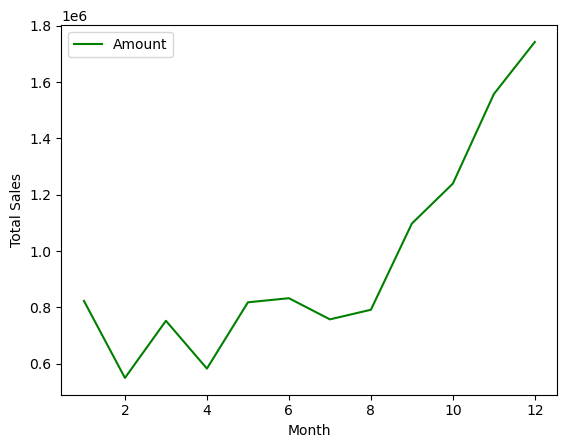

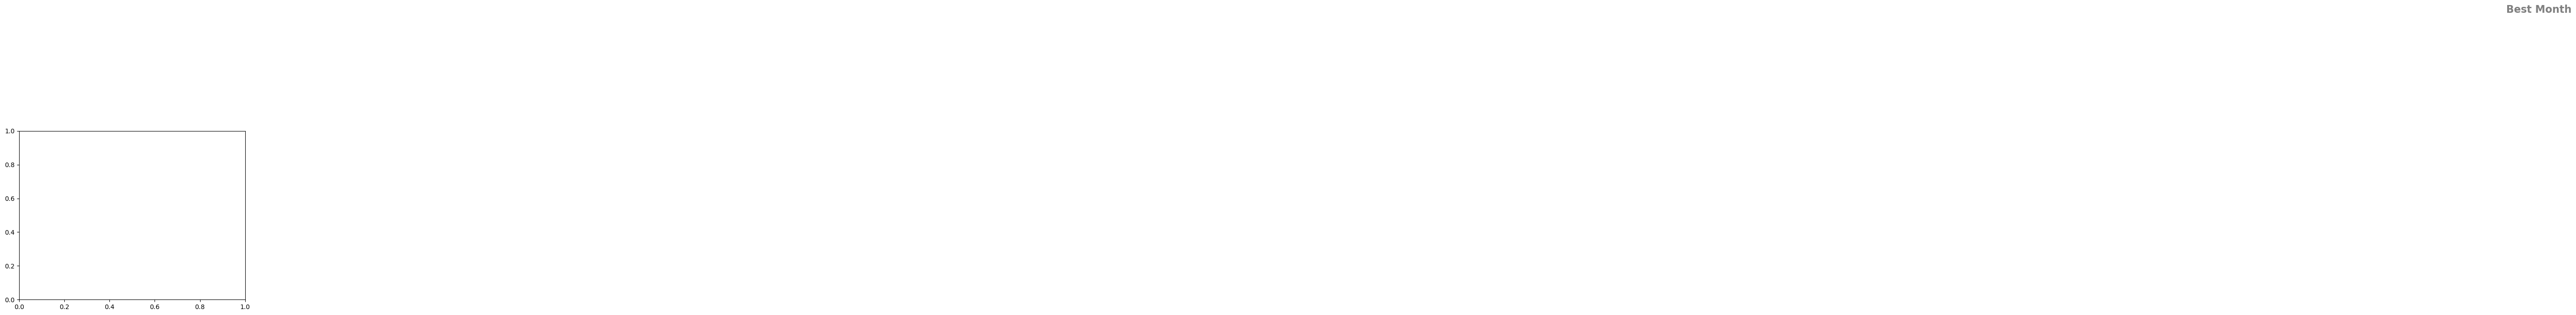

In [15]:

# MONTHLY AMOUNT

* ## Plot Total Sales Per Month for Year 2011.  How the total sales have increased over months in Year 2011. Which month has lowest Sales? The highest Sales? Add text and arrow indicating the worse month and the best month.

<span class="burk">(Hint: filter the data to concidere only the year=2011 and groub by month)</span>

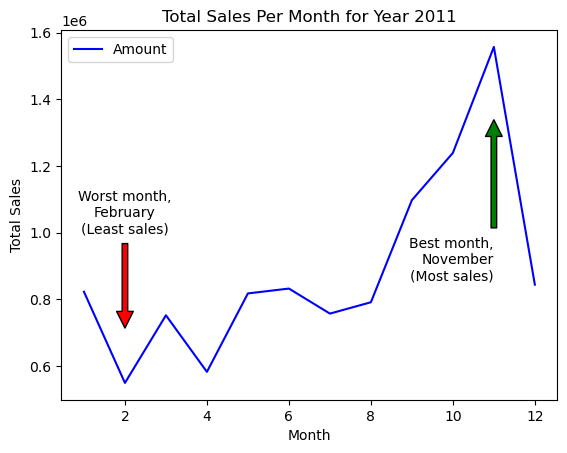

Month
1      822669.640
2      549134.460
3      752003.310
4      582318.451
5      817655.200
6      832231.670
7      757108.941
8      791173.020
9     1097467.722
10    1239237.260
11    1557236.410
12     843909.020
Name: Amount, dtype: float64


In [101]:
sales_by_month_2011 = df[df['Year'] == 2011].groupby('Month')['Amount'].sum()

sales_by_month_2011.plot(color='blue', legend=True, label='Amount')

best_month = sales_by_month_2011.idxmax()
worst_month = sales_by_month_2011.idxmin()
max_sales = sales_by_month_2011.max()
min_sales = sales_by_month_2011.min()

month_names = {1 : "January", 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
              7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Annotating the maximum sales month
plt.annotate(f'Best month,\n{month_names[best_month]}\n(Most sales)',
             xy=(best_month, max_sales-200000), # point to annotate
             xytext=(best_month, max_sales-700000), # slightly offset text for clarity
             arrowprops=dict(facecolor='green', shrink=0.05), # arrow style
             horizontalalignment='right')

# Annotating the minimum sales month
plt.annotate(f'Worst month,\n{month_names[worst_month]}\n(Least sales)',
             xy=(worst_month, min_sales+150000), # point to annotate
             xytext=(worst_month, min_sales+450000), # slightly offset text for clarity
             arrowprops=dict(facecolor='red', shrink=0.05), # arrow style
             horizontalalignment='center')

plt.ylabel('Total Sales')
plt.title('Total Sales Per Month for Year 2011')
plt.show()

print(sales_by_month_2011)

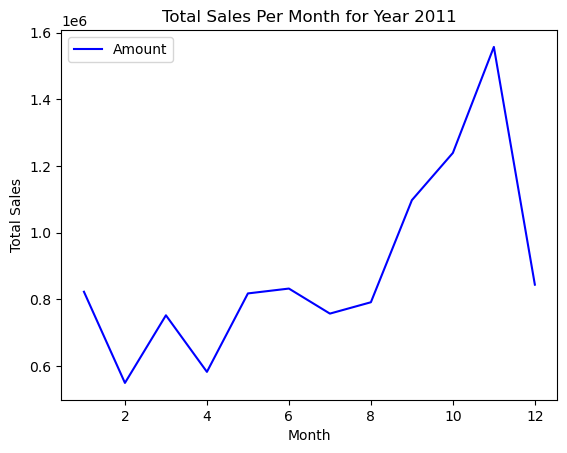

Month
1      822669.640
2      549134.460
3      752003.310
4      582318.451
5      817655.200
6      832231.670
7      757108.941
8      791173.020
9     1097467.722
10    1239237.260
11    1557236.410
12     843909.020
Name: Amount, dtype: float64

### Plot Total Sales Per Month for Year 2011 as Bar Plot.  Is Bar Plot Better to visualize than Simple Plot?

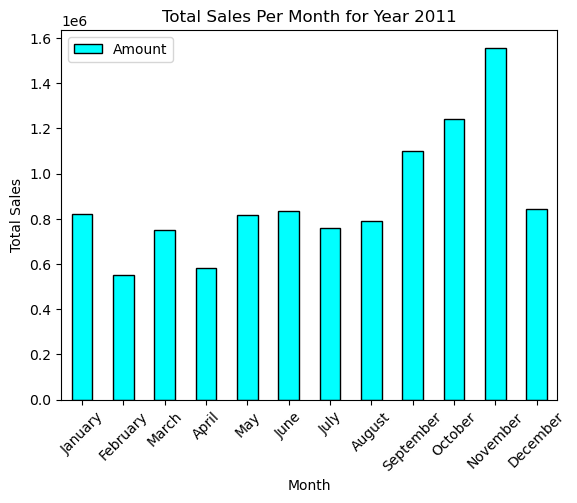

In [109]:
sales_by_month_2011.plot.bar(color='cyan', edgecolor='black', linewidth=1.0, legend=True, label='Amount')

best_month = sales_by_month_2011.idxmax()
worst_month = sales_by_month_2011.idxmin()
max_sales = sales_by_month_2011.max()
min_sales = sales_by_month_2011.min()

month_names = {1 : "January", 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
              7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Set the x-axis label to the month names using the index of the Series
plt.xticks(ticks=range(len(sales_by_month_2011)),
           labels=[month_names[i] for i in sales_by_month_2011.index],
          rotation = 45)

plt.ylabel('Total Sales')
plt.title('Total Sales Per Month for Year 2011')
plt.show()

* ## Plot Pie Chart for Year 2011 for these countries: USA, United, Kingdom, France, Germany, Netherlands and EIRE. 
* ## From your pie chart, which Country contributes highest towards sales?
* ## Bonus: can you print the percentage of sales on each pie?

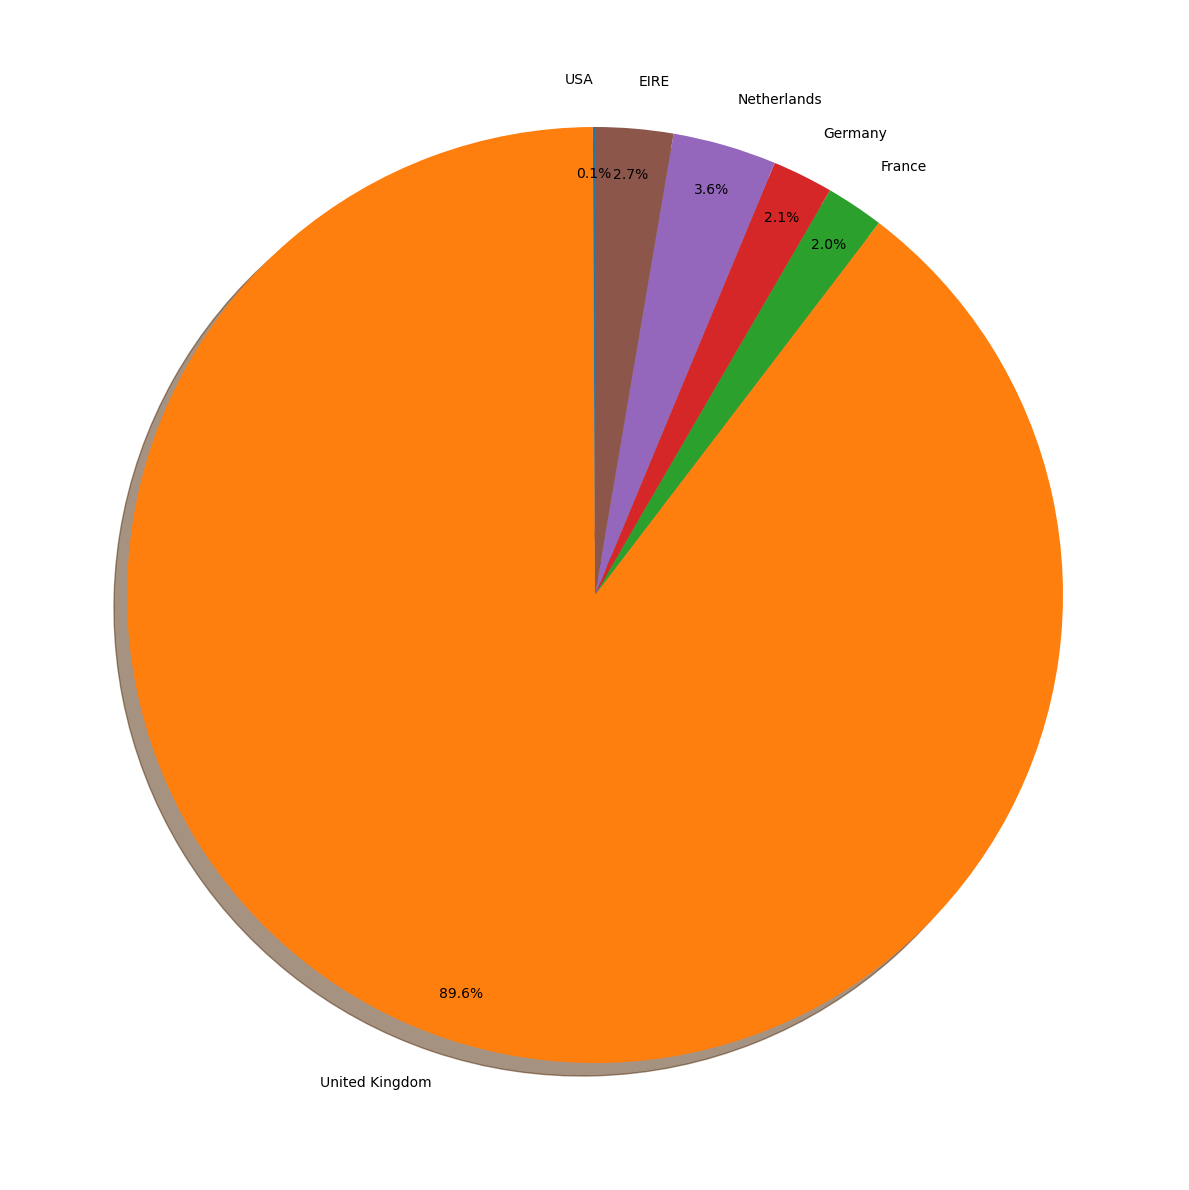

In [134]:
country_list=['USA','United Kingdom','France','Germany','Netherlands','EIRE']
series = pd.Series(df[df['Year'] == 2011].groupby('Country')['Quantity'].sum(),
                   index=country_list);

plt.figure(figsize=(12,12))

series.plot.pie(
    label='',           # Remove the label for the y-axis (quantity by default)
    shadow=True,        # Add a shadow for aesthetic purposes
    startangle=90,      # Start the first section on the top of the circle
    autopct='%1.1f%%',   # Format the percentages to one decimal place
    pctdistance=0.9,     # Adjust this value to move the text towards the edge
    textprops={'fontsize': 10, 'color': 'black'}  # Adjust fontsize and text color

)

plt.tight_layout()

In [16]:
country_list=['USA','United Kingdom','France','Germany','Netherlands','EIRE']
series = pd.Series(df.groupby('Country')['Quantity'].sum(),
                    index=country_list);

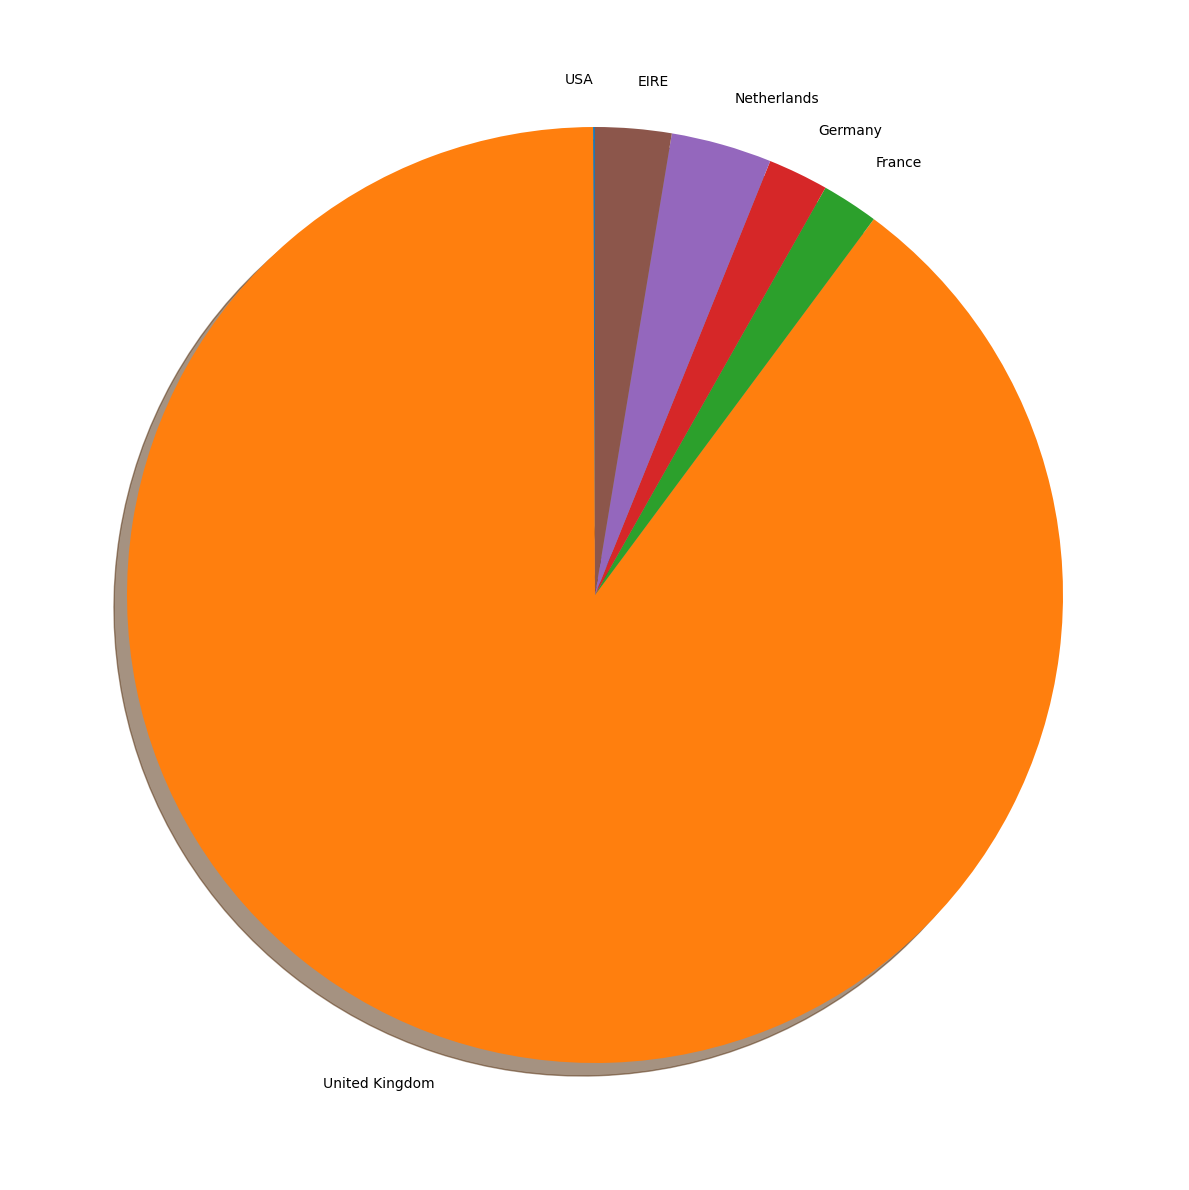

In [17]:
plt.figure(figsize=(12,12))
series.plot.pie(label='',shadow = True,startangle = 90)
plt.tight_layout()

# Good Job!